In [1]:
from pylab import *
from JSAnimation import IPython_display
from matplotlib import animation
%matplotlib inline

### 1. Se tiene un oscilador armónico en dos dimensiones (xy) el que la fuerza está dada por $\vec{F} = −k\vec{r}$ y se tiene una fricción $\vec{f}_{fric} = −\gamma\vec{v}$ si $|\vec{v}| ≤ 1$, pero cuando $|\vec{v}| > 1$ la fricción es $\vec{f}_{fricc} = −\mu v^{\frac{3}{2}}\hat{v}$. Si $m = 1$,$γ = 0.1$ y $µ = 0.2$, resuelva las siguientes ejercicios:


Encuentre las ecuaciones de movimiento en coordenadas cartesianas y polares. No es necesario resolver las ecuaciones en ambos sistemas, elija el que más le guste y con una transformación de coordenadas obtenga los resultados para el otro sistema de coordenado.

### Oscilador en coordenadas polares.

De las ec. de Euler-Lagrange:

$$
\frac{d}{dt} \left( \frac{ \partial L}{ \partial \dot{q_i}} \right) - \frac{ \partial L}{\partial q_i}=f_{fric}
$$

$$
\vec{F}=-k \vec{r} \implies V= \frac{k}{2}r^2 \implies L=\frac{m}{2}(\dot{r}^2+(r \dot{\theta})^2) - \frac{k}{2}r^2
$$

Con $q_1=r,q_2= \theta$ 

$$
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{r}}\right)=m\ddot{r} \hspace{2cm} \frac{\partial L}{\partial r}=m r\dot{\theta}^2-kr
$$

$$
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{\theta}}\right)=m(r\ddot{\theta}+\dot{r}\dot{\theta}) \hspace{2cm} \frac{\partial L}{\partial \theta}=0
$$

La ecuaciones de movimiento quedan como:

$$
m\ddot{r} -r(m\dot{\theta}^2-k)=f_{fric}\dot{}\hat{r} \hspace{2cm} m(r\ddot{\theta}+\dot{r}\dot{\theta})=f_{fric}\dot{}\hat{\theta}
$$

### Coordenadas cartesianas

$$
\vec{F}=-k \vec{r} \implies V= \frac{k}{2}r^2=\frac{k}{2}x^2+y^2 \implies L=\frac{m}{2}(\dot{x}^2+\dot{y}^2) - \frac{k}{2}(x^2+y^2)
$$

Con $q_1=x,q_2=y$ 

$$
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{x}}\right)=m\ddot{x} \hspace{2cm} \frac{\partial L}{\partial x}=-kx
$$

$$
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{y}}\right)=m\ddot{y} \hspace{2cm} \frac{\partial L}{\partial y}=-ky
$$

La ecuaciones de movimiento quedan como:

$$
m\ddot{x} +kx=f_{fric}\dot{}\hat{x} \hspace{2cm} m\ddot{y}+ky=f_{fric}\dot{}\hat{y}
$$

In [2]:
def RK4(ec,p_ini,x,args=[],h=0.01): #integrador Runge-Kutta de  4 orden el cual integra ecuaciones diferenciales
    if (x[1]-x[0]) < 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Para el ejercicio integraremos las ecuaciones en coordenadas cartesianas ya que numericamente son mas sencillas y evitan que el método diverga.

Para $|v|\leq1$
$$
m\ddot{x} +kx=-\gamma \dot{x} \hspace{2cm} m\ddot{y}+ky=-\gamma \dot{y}
$$

Para $|v|\geq1$
$$
m\ddot{x} +kx=-\mu \sqrt{v} \dot{x} \hspace{2cm} m\ddot{y}+ky=-\mu \sqrt{v} \dot{y}
$$
Donde $v=\sqrt{\dot{x}^2+\dot{y}^2}$


In [3]:
def osc_2D(r_v,t,args=0,m=1,k=1): #funcion donde programa mi ecuación diferencial
    dx=r_v[2] #derivada de x
    dy=r_v[3] #derivada de y
    v=sqrt(dx**2+dy**2) #valor de velocidad
    gamma,mu = args[0],args[1] #argumentos de fricción
    if v<=1: #si v es menor igual que uno
        dv_x=-k*r_v[0]-gamma*r_v[2]/m #derivadas de vx y vy, utiliza el modelo de friccion proporcional a v
        dv_y=-k*r_v[1]-gamma*r_v[3]/m 
    else: #si no
        dv_x=-k*r_v[0]-mu*sqrt(v)*r_v[2]/m #utiliza el modelo de fricción proporcional a v^3/2
        dv_y=-k*r_v[1]-mu*sqrt(v)*r_v[3]/m  
    return array([dx,dy,dv_x,dv_y])#refresame las derivadas
    

(b) Utilice el m´etodo de Runge-Kutta de 4to orden para encontrar la solución a las ecuaciones de movimiento en el inciso anterior con condiciones iniciales $\vec{r}_0 = (0, 1)$ y $\vec{v}_0 = (cos θ,sin θ)$, donde $θ =\frac{n \pi}{6}$ con $n = 0, 1, 2, 3, ..., 10, 11$.

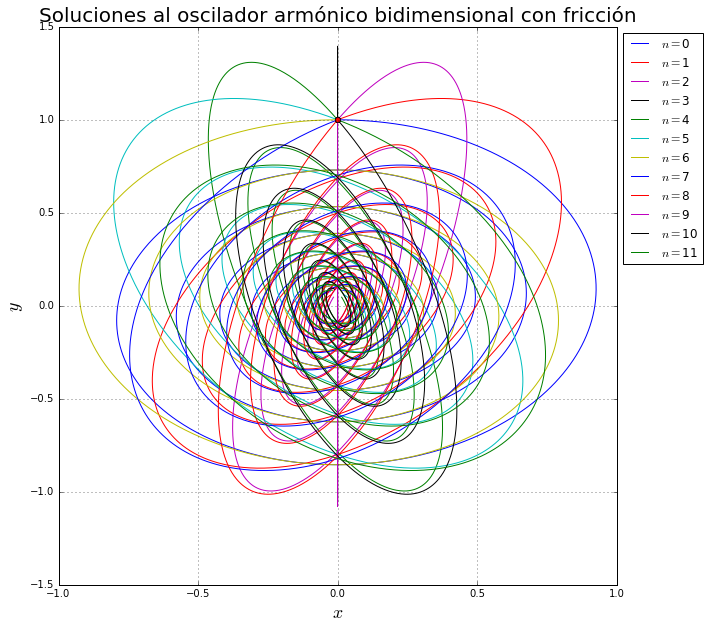

In [4]:
figure(figsize=(10,10)) #hago una figura
for n in xrange(12): #para n de 0 a 11
    t,sol=RK4(osc_2D,[0,1,cos(n*pi/6),sin(n*pi/6)],[0,50],[0.1,0.2]) #integra la ecuacion de movimiento
    plot(sol[:,0],sol[:,1],label="$n=$"+str(n)) #grafica el plano xy
    plot(sol[0,0],sol[0,1],'o',markersize=5) #grafica el punto de la condicion inicial
xlabel("$x$",fontsize=18) #etiquetas y titulo
ylabel("$y$",fontsize=18)
title(u"Soluciones al oscilador armónico bidimensional con fricción",fontsize=20)
legend(loc=0, bbox_to_anchor=(1,1))
grid(True)

(c) Genere una función que calcule la energía para las distintas condiciones iniciales y detenga la simulación cuando ésta sea menor al $1 \%$ de su valor inicial.

Utilizare que

$$
E=\frac{m}{2}v^2+\frac{k}{2}r^2
$$

In [5]:
def Energia(n,dt=.1,m=1,k=1,): #defino mi función de energía
    cond_inicial=array([0,1,cos(n*pi/6),sin(n*pi/6)]) #mis condiciones iniciales dependende de n
    E_i= m*((cond_inicial[2]**2) + (cond_inicial[3]**2))/2 + k*((cond_inicial[0]**2) + (cond_inicial[1]**2))/2 
    #la energia inicial con las condiciones iniciales
    Energias=[E_i] #inicio una lista de energias
    tiempos=[0] #y otra de tiempos
    i=0 #i es un contador
    while Energias[-1]>0.01*E_i: #mientras el ultimo elemento de energias sea mayor que 0.01E_inicial 
        t,sol=RK4(osc_2D,cond_inicial,[0,dt],[0.1,0.2]) #integra la ecuacion de 0 a dt
        cond_inicial=sol[-1,:] #redefine las condiciones con la ultima integracion
        E=m*(cond_inicial[2]**2+cond_inicial[3]**2)/2 + k*(cond_inicial[0]**2 + cond_inicial[1]**2)/2  #calcula la energia
        i += 1 #contador aumenta
        tiempos.append(dt*i) #ve apendando los tiempos
        Energias.append(E) #y apenda la energia
    return tiempos,Energias #regresame tiempos y energias

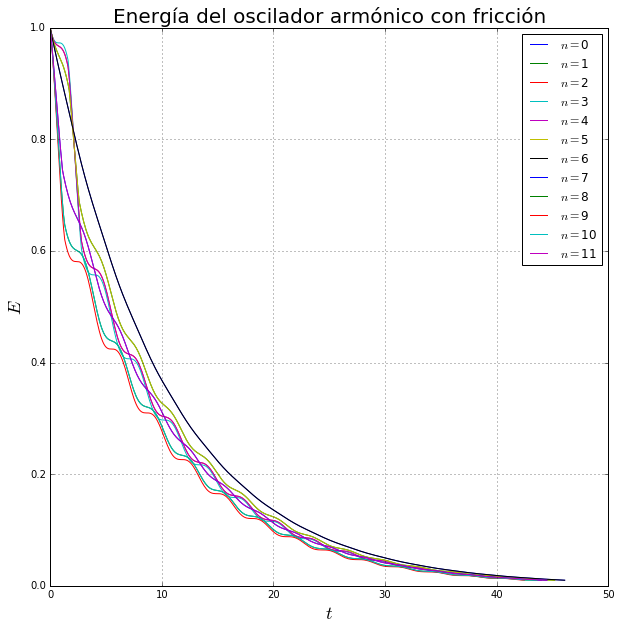

In [6]:
figure(figsize=(10,10),dpi=100)#haz una figura
for n in xrange(12): #para cada n
    t,E=Energia(n)#pon a trabajar la funcion energia
    plot(t,E,label="$n=$"+str(n)) #grafica t vs E
grid(True)
xlabel("$t$",fontsize=18) #etiquetas y titulo
ylabel("$E$",fontsize=18)
title(u"Energía del oscilador armónico con fricción",fontsize=20)
legend(loc=0, bbox_to_anchor=(1,1))
grid(True)
show()

(d) Dibuje las gráficas del momento angular para los casos anteriores en el inciso (1b).

Usando la expresion $\vec{L}=\vec{r}x\vec{P} \implies |\vec{L}|=m(xv_{y}-yv_{x})$ 

In [7]:
def Mom_ang(n): #funcion momento angular
    t,sol=RK4(osc_2D,array([0,1,cos(n*pi/6),sin(n*pi/6)]),[0,50],[0.1,0.2]) #solucion 
    L=sol[:,0]*sol[:,3]-sol[:,1]*sol[:,2]#defino al momento angular con la expresion anterior
    return t,L #me regresa tiempos y momento angular

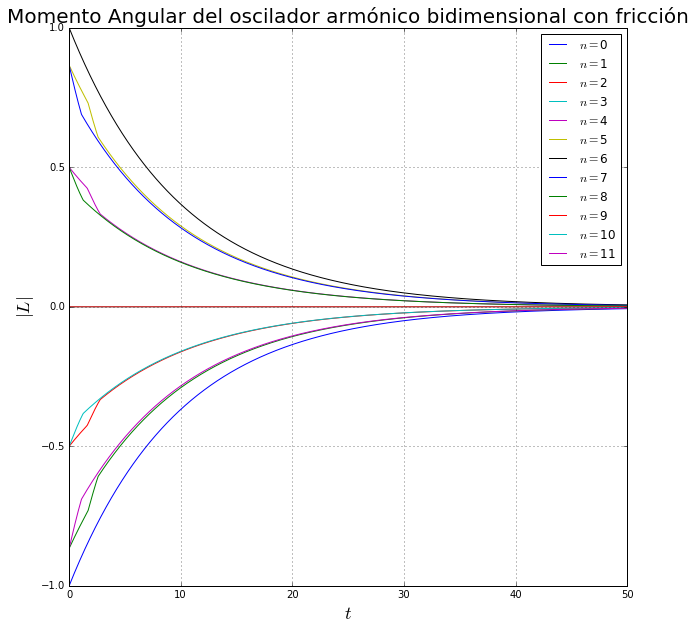

In [8]:
figure(figsize=(10,10))
for n in xrange(12):
    t,L=Mom_ang(n)
    plot(t,L,label="$n=$"+str(n))
grid(True)
xlabel("$t$",fontsize=18) #etiquetas y titulo
ylabel("$|L|$",fontsize=18)
title(u"Momento Angular del oscilador armónico bidimensional con fricción",fontsize=20)
legend(loc=0, bbox_to_anchor=(1,1))
show()

(e) Tome de manera arbitraria alguna condición inicial y dibuje el espacio fase $(P_{x}, x)$ y $(P_{\rho}, ρ)$.

Para obtener los momentos generalizados utilizo que $\frac{\partial L}{\partial \dot{q_{i}}}=P_{i}$

Del lagrangiano en coordenadas cartesianas y polares respectivamente obtenemos que:

$$
P_{x}=\frac{\partial L}{\partial \dot{x}}=m\dot{x} \hspace{2cm} P_{\rho}=\frac{\partial L}{\partial \dot{\rho}}=m\dot{\rho}
$$

Además se tiene que:

$$
\rho=\sqrt{x^2 +y^2} \implies \dot{\rho}=\frac{x\dot{x}+y\dot{y}}{\sqrt{x^2+y^2}} \implies P_{\rho}=\frac{P_{x}x+P_{y}y} {\sqrt{x^2+y^2}}
$$

Cambios de coordenadas que utilizo:

$$
r=\sqrt{x^2+y^2} \hspace{1cm}  \dot{\rho}=\frac{\dot{x}x+\dot{y}y}{\sqrt{x^2+y^2}} \hspace{1cm} \theta=arctan(\frac{y}{x}) \hspace{1cm} \dot{\theta}=\frac{x\dot{y}-y\dot{x}}{x^2+y^2}
$$

In [9]:
def espacio_fase(t,m=1): #funcion del espacio fase
    cond_ini=rand(4) #la condicion inicial es aleatoria
    x0,y0,vx0,vy0=cond_ini[0],cond_ini[1],cond_ini[2],cond_ini[3] #defino x,y,vx,vy de las condiciones iniciales
    cond_ini_pol=array([sqrt(x0**2+y0**2),arctan(y0/x0),(x0*vx0+y0*vy0)/(sqrt(x0**2+y0**2)),(x0*vy0-y0*vx0)/(x0**2+y0**2)]) #las condiciones iniciales en polares, utilize cambio de coordenadas
    print "Las condiciones iniciales (x,y,v_x,v_y)=",cond_ini #condiciones iniciales cartesianas
    print "Las condiciones iniciales (r,theta,v_r,v_theta)=",cond_ini_pol #condiciones iniciales polares
    t,sol=RK4(osc_2D,cond_ini,t,[0.1,0.2]) #integracion
    x=sol[:,0] #coordenada x
    p_x=m*sol[:,2] #momento asociado a x
    r=sqrt(sol[:,0]**2+sol[:,1]**2) #rho
    p_r=m*(sol[:,0]*sol[:,2]+sol[:,1]*sol[:,3])/r #momento asociado a rho
    return x,p_x,r,p_r #regresame x,rho y sus momentos

Las condiciones iniciales (x,y,v_x,v_y)= [ 0.47886241  0.26218113  0.47460877  0.0888173 ]
Las condiciones iniciales (r,theta,v_r,v_theta)= [ 0.54593787  0.50092816  0.45895062 -0.27479517]


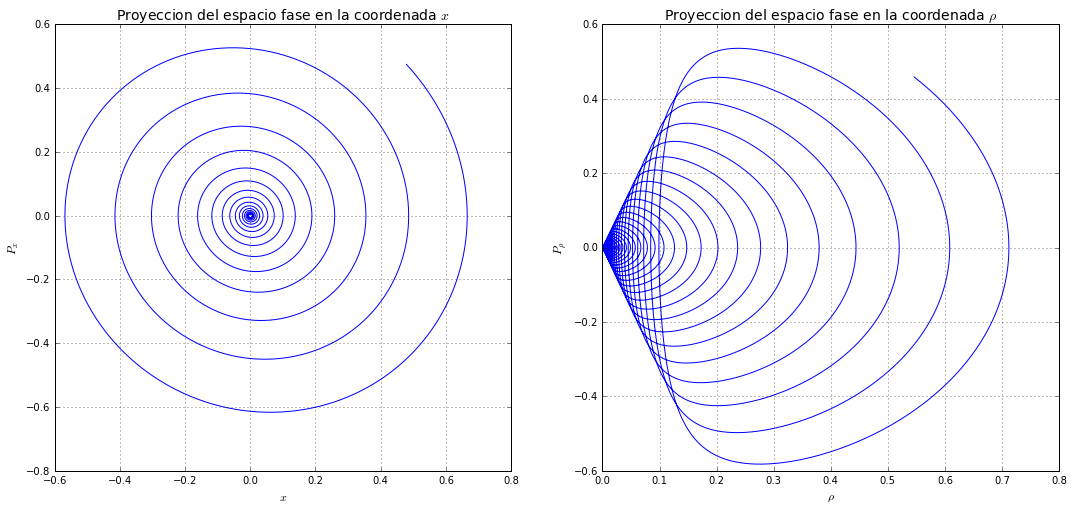

In [10]:
x_r=espacio_fase([0,100]) #pongo a trabajr la funcion espacio_fase
figure(figsize=(18,8),dpi=100) #hago una figura
subplot(1,2,1) #subplot 1
plot(x_r[0],x_r[1]) #grafico x y px
xlabel(r"$x$",fontsize=12) #titulo y etiquetas
ylabel(r"$P_{x}$",fontsize=12)
title(u"Proyeccion del espacio fase en la coordenada $x$",fontsize=14)
grid(True)
subplot(1,2,2) #subplot 2
plot(x_r[2],x_r[3]) #grafica de rho y p_rho
xlabel(r"$\rho$",fontsize=12) #titulo y etiquetas
ylabel(r"$P_{\rho}$",fontsize=12)
title(r"Proyeccion del espacio fase en la coordenada $\rho$",fontsize=14)
grid(True)
show()

### 2. Suponga que se tiene el sistema como en el problema anterior, pero ahora la partícula tiene carga q > 0 y en el origen también se encuentra una partícula de carga q > 0.

Ahora bien si le ponemos una fuerza de tipo coulumbiana tenemos lo siguiente:

$$
\vec{F}(\vec{r}) = -k_1\vec{r}+k_q \frac{q^2}{r^2} \implies V(r)=\frac{k_1}{2}r^2-k_q \frac{q^2}{r}
$$

Por lo que la única diferencia de las ecuaciones que se vieron anteriormente es 

$$
\frac{\partial L}{\partial r}= m r \dot{\theta}^2 -kr + k_q\frac{q^2}{r^2}
$$

Por lo tanto las ecuaciones diferenciales en polares quedan como:

$$
m\ddot{r} -r(m\dot{\theta}^2-k)-k_q\frac{q^2}{r^2}=f_{fric}\dot{}\hat{r} \hspace{2cm} m(r\ddot{\theta}+\dot{r}\dot{\theta})=f_{fric}\dot{}\hat{\theta}
$$

En coordenadas cartesianas tenemos.

$$
\vec{F(\vec{r}} = -k_1\vec{r}+k_q \frac{q^2}{r^2} \implies V(x,y)=\frac{k_1}{2}(x^2+y^2)-k_q \frac{q^2}{\sqrt{(x^2+y^2)}}
$$

y sus ecuaciones se modifican en:

$$
\frac{\partial L}{\partial x}=-kx + k_q q^2\frac{x}{(x^2+y^2)^{\frac{3}{2}}} \hspace{2cm} \frac{\partial L}{\partial y}=-ky + k_q q^2\frac{y}{(x^2+y^2)^{\frac{3}{2}}}
$$

Por lo tanto las ecuaciones de movimeiento en cartesianas quedan:

$$
m\ddot{x} +kx-k_q q^2\frac{x}{(x^2+y^2)^{\frac{3}{2}}}=f_{fric}\dot{}\hat{x} \hspace{2cm} m\ddot{y}+ky-k_q q^2\frac{y}{(x^2+y^2)^{\frac{3}{2}}}=f_{fric}\dot{}\hat{y}
$$

In [11]:
def osc_2D_carga(r_v,t,args=[0,0],m=1,q=1,k=1,k_q=1): #funcion del oscilador con carga
    dx=r_v[2] #derivada de x
    dy=r_v[3] #derivada de y
    v=sqrt(r_v[2]**2+r_v[3]**2) #velocidad
    r32=(r_v[0]**2+r_v[1]**2)**(1.5) # r^3/2
    gamma, mu = args[0], args[1] #argumentos de la friccion
    if sqrt(dx**2+dy**2)<1: #modelos de friccion del caso anterior
        dv_x=-k*r_v[0]-gamma*r_v[2]/m + k_q*q*q*r_v[0]/(r32) #derivada de vx y vy
        dv_y=-k*r_v[1]-gamma*r_v[3]/m + k_q*q*q*r_v[1]/(r32)
    else:
        dv_x=-k*r_v[0]-mu*sqrt(v)*r_v[2]/m + k_q*q*2*r_v[0]/(r32)
        dv_y=-k*r_v[1]-mu*sqrt(v)*r_v[3]/m + k_q*q*2*r_v[1]/(r32)
    return array([dx,dy,dv_x,dv_y]) #regresame las derivadas

(a) Sin considerar la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).

El sistema si puede tener órbitas cerradas ya que el potencial efectivo $V_{eff}(r)=\frac{k_1}{2}r^2-k_q \frac{q^2}{r} + \frac{L^2}{2mr^2}$ tiene un mínimo lo que implica que al menos tiene una órbita cerrada, fuera de este punto el sistema si es cerrado pero las órbitas no son periódicas.
derivando $V(r)_{eff}$ e igualando a 0 encontramo la $r$ para la cual una orbita es cerrada. 

$$
\frac{d}{dr}V_{eff}=kr-k_q\frac{q^2}{r^2}-\frac{L^2}{2m}\frac{1}{r^3}=0 \implies kr_{min}^4+k_qq^2r_{min}-\frac{L^2}{2m}=0
$$

Hagamos las simulaciones!!

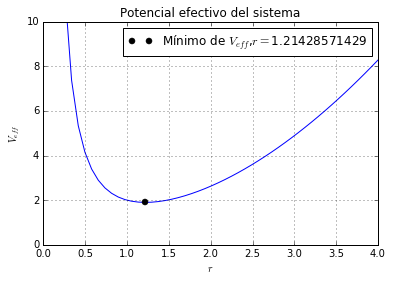

In [12]:
def potencial_eff(r,k=1,k_q=1,q=1,m=1,L=1): #funcion potencial
    V=0.5*k*r*r+(k_q*q*q/r)+L*L/(2*m*r*r) #potencial efectivo
    return r,V #regresa el potencial

r,Veff=potencial_eff(linspace(0.1,4)) #pongo a trabajar la funcion
plot(r,Veff) #grafico r vs Veff
plot(r[14],Veff[14],'ko',label=u"Mínimo de $V_{eff}$,$r=$"+str(r[14])) #grafico el minimo de Veff
xlabel("$r$") #etiquetas y titulo
ylabel(r"$V_{eff}$")
title("Potencial efectivo del sistema")
legend()
ylim([0,10])
grid(True)
show()


Como utilizamos que $L=1$ y ademas $r_{min} \sim 1.2$,entonces $x(0)v_y(0)-y(0)v_x(0)=1.2$ y $ \sqrt{x(0)^2+y(0)^2}=1.2 \implies x(0)=1.2$, $y(0)=0$ y $v_y(0)=\frac{1}{1.2}$, satisfacen dicha condición.

Además de la gráfica de potencial vemos que para radios distintos el Veff es mayor entonces tendremos figuras que oscilan entre dos radios pero no se consideran orbitas cerradas ya que su periodo es de varias revoluciones alrededor de estos radios.

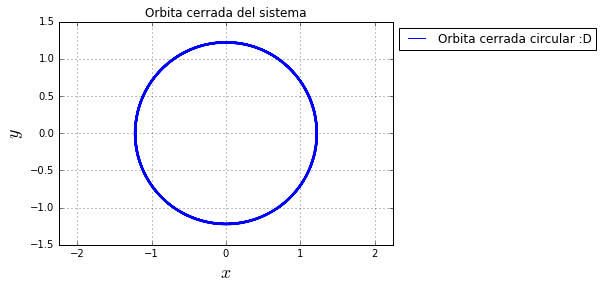

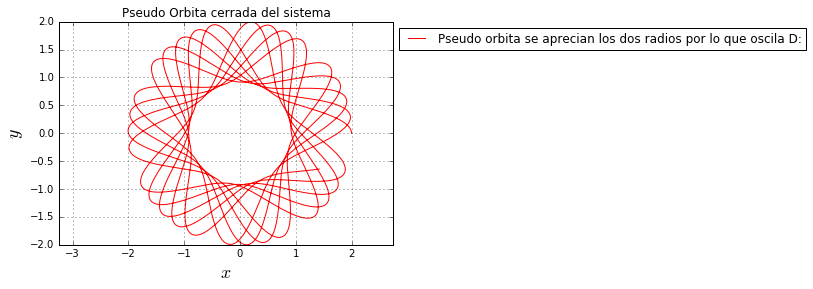

In [13]:
t,sol=RK4(osc_2D_carga,[1.21,0,0,1/1.21],[0,100],[0,0])#integro la ecuacion de movimiento
plot(sol[:,0],sol[:,1],label="Orbita cerrada circular :D") #grafico
xlabel("$x$",fontsize=18) #etiquetas y titulo
ylabel("$y$",fontsize=18)
title("Orbita cerrada del sistema")
legend(loc=0, bbox_to_anchor=(1,1))
axis('equal')
grid(True)
show()

t,sol=RK4(osc_2D_carga,[2,0,0,0.5],[0,100],[0,0])#integro la ecuacion de movimiento
plot(sol[:,0],sol[:,1],'r',label="Pseudo orbita se aprecian los dos radios por lo que oscila D:") #grafico
xlabel("$x$",fontsize=18) #etiquetas y titulo
ylabel("$y$",fontsize=18)
title("Pseudo Orbita cerrada del sistema")
legend(loc=0, bbox_to_anchor=(1,1))
axis('equal')
grid(True)
show()

(b) Considerando fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).

En este caso en teoria no se puede tener orbitas cerradas ya que el sistema pierde energía por la fricción pero dada una fricción muy pequeña podemos tener orbitas cerradas un tiempo finito con la condición del radio que minimiza al potencial efectivo si la velocidad cambia o la fricción es mayor no se aprecia esto, Hagamos unas simulaciones acerca de esto.


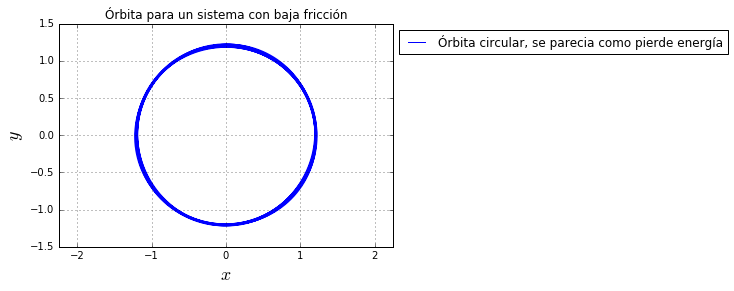

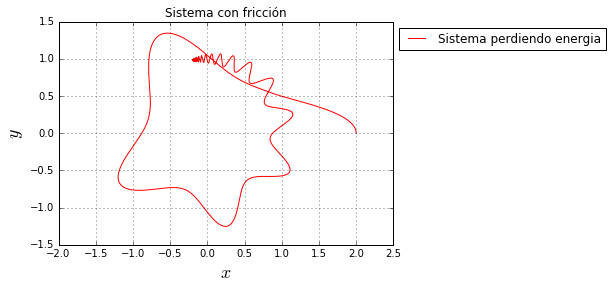

In [14]:
t,sol=RK4(osc_2D_carga,[1.21,0,0,1/1.21],[0,100],[0.001,0.001])#integracion con fricciones muy pequeñas
plot(sol[:,0],sol[:,1],label=u"Órbita circular, se parecia como pierde energía") #grafica
xlabel("$x$",fontsize=18) #etiquetas y titulo
ylabel("$y$",fontsize=18)
title(u"Órbita para un sistema con baja fricción")
legend(loc=0, bbox_to_anchor=(1,1))
grid(True)
axis('equal')
show()

t,sol=RK4(osc_2D_carga,[2,0,0,0.5],[0,100],[0.1,0.2])#integracion con fricciones mayores y diferente radio
plot(sol[:,0],sol[:,1],'r',label=u"Sistema perdiendo energia") #grafica
xlabel("$x$",fontsize=18) #etiquetas y titulo
ylabel("$y$",fontsize=18)
title(u"Sistema con fricción")
legend(loc=0, bbox_to_anchor=(1,1))
grid(True)
axis('equal')
show()

### 3. Se tiene una partícula de masa m = 1 en un campo gravitacional $\vec{g} = −9.8\hat{j}$ en una caja como se muestra en la Figura 1 con L = 10 m y d = 3 m. Realice los ejercicios con valores de $α = \frac{\pi}{6}$ y $α = \frac{π}{10}$


In [15]:
def e_mov(r_v,t,alfa_gamma=[0,0],g=9.8,m=1): #ecuaciones de movimiento, #dos argumentos el angulo y la friccion
    dx = r_v[2] #derivada de x
    dy = r_v[3] #derivada de y
    alfa,gamma=alfa_gamma[0],alfa_gamma[1]
    dvx = g*sin(alfa)-gamma*r_v[2] #derivada de vx utilizo segunda ley de newton
    dvy = -g*cos(alfa)-gamma*r_v[3] #derivada de vy, utilizando segunda ley de Newton
    return array([dx,dy,dvx,dvy]) #me regresa array de las derivadas


def pared_arriba(r_v_i,mi_dt,alfa_gamma=[0,0]): #programa el techo de la caja
    dt_bus = mi_dt/2 #reduzco mi dt a la mitad
    y_izq=r_v_i #punto que va entrar a la integracion
    alfa,gamma=alfa_gamma[0],alfa_gamma[1]
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],[0,gamma]) #integro con la cond inicial anterior,#en este caso alfa=0
    ymed = sol[-1,:] #obtengo un punto medio
    while abs(y_izq[1]-3-5*tan(alfa)) > 1e-11: #mientras el punto anterior menos la altura de la caja sea disitnto a 0 en su componente y 
        if (y_izq[1]-3-5*tan(alfa))*(ymed[1]-3-5*tan(alfa)) < 0: #si cruza el techo
            reinicio = y_izq #el punto anterior sera la nueva cond inicial
        else: #si no es asi
            reinicio = ymed #el punto medio calculado previo sera la cond inicial
        dt_bus = dt_bus/2 #redusco una vez mas el dt de busqueda (metodo de biseccion)
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],[0,gamma]) #vuelvo a integrar en este caso alfa=0
        y_izq = reinicio #mi punto que ahora voy a usar como parametro para saber cuando hay rebote
        ymed = sol[-1,:] #es el ultimo punto que integro
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]]) #cambio la componente vertical de la velocidad
    return y_izq

#el metodo de encontrar el rebote es basicamente el mismo en todas las paredes especifico las sutiles diferencias

#destaco que para esta pared hago un previo cambio de coordenadas mediante rotaciones de tal manera que este plano en realidad sea una recta
#horizontal 
def pared_abajo_1(r_v_i,mi_dt,alfa_gamma=[0,0]): #programo el plano inclinado derecho 
    dt_bus = mi_dt/2
    p_ant=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],alfa_gamma)
    pmed = sol[-1,:]
    while abs(p_ant[1]) > 1e-10:
        #print p_ant[1],pmed[1]#si no esta en cero el punto anterior en su componente y
        if p_ant[1]*pmed[1] < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],alfa_gamma) #integro con la ecuacion del plano inclinado
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    p_ant = array([p_ant[0],p_ant[1],p_ant[2],-p_ant[3]]) #cambia la componente vertical de la velocidad (sigo estando en ejes rotados)
    return p_ant
            
#igualmente para esta pared hice un previo cambio de coordenadas que me permiten trabajar como si el plano inclinado fuese una recta horizontal
def pared_abajo_2(r_v_i,mi_dt,alfa_gamma=[0,0]):
    dt_bus = mi_dt/2
    p_ant=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],alfa_gamma)
    pmed = sol[-1,:]
    while abs(p_ant[1]) > 1e-10: #si no se encuentra en cero el punto anterior en su componente y
        if p_ant[1]*pmed[1] < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],alfa_gamma) #integro con la ecuacion del plano inclinado
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    p_ant = array([p_ant[0],p_ant[1],p_ant[2],-p_ant[3]]) #cambio la componente vertical de la velocidad
    return p_ant

def pared_izq(r_v_i,mi_dt,alfa_gamma=[0,0]):
    dt_bus = mi_dt/2
    p_ant=r_v_i
    alfa,gamma=alfa_gamma[0],alfa_gamma[1]
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],[0,gamma]) #no hay inclinacion alfa=0
    pmed = sol[-1,:]
    while abs(p_ant[0]) > 1e-11: #mientras la componte x del punto anterior sea disitnta de 0
        if (p_ant[0]*pmed[0]) < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],[0,gamma]) 
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    p_ant = array([p_ant[0],p_ant[1],-p_ant[2],p_ant[3]]) #cambia la componente horizontal de la velocidad
    return p_ant

def pared_der(r_v_i,mi_dt,alfa_gamma=[0,0]):
    dt_bus = mi_dt/2
    p_ant=r_v_i
    alfa,gamma=alfa_gamma[0],alfa_gamma[1]
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],[0,gamma]) #no hay inclinacion alfa]=0
    pmed = sol[-1,:]
    while abs(p_ant[0]-10) > 1e-11: #mientras la componente x del punto anterior menos la longitud de la caja sea disitnto de 0
        if (p_ant[0]-10)*(pmed[0]-10) < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],[0,gamma])
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    p_ant = array([p_ant[0],p_ant[1],-p_ant[2],p_ant[3]]) #cambia la componente horizontal de la velocidad
    return p_ant


In [16]:
def caja(alfa_gamma,dt,v,n,r_max=20,i=0): #funcion de la caja
    alfa,gamma=alfa_gamma[0],alfa_gamma[1]
    trayectoria = [array([5./3,10*tan(alfa)/3.,v*cos(n*alfa),v*sin(n*alfa)])] #mi condicion inicial cumple que este a un tercio de la distnacia dle plano de la derecha, y las velocidad estan relacionadas con la inclinación del plano
    while i< r_max: #mientras i sea menor que rebotes maximo corre
        t,sol_dt=RK4(e_mov,trayectoria[-1],[0,dt],[0,gamma]) #realiza una integracion con estos parametros
        if (sol_dt[-1,:][1]-(5-sol_dt[-1,:][0])*tan(alfa) <= 0) and sol_dt[-1,:][0]<=5 : #si hay un cambio de signo en y y ademas la pelota esta en el plano izquierdo
            x,y,vx,vy=trayectoria[-1][0],trayectoria[-1][1],trayectoria[-1][2],trayectoria[-1][3] #en las siguientes lineas realizo rotaciones (mas una traslación) correspondientes al plano inclinado 1
            x_p=x*cos(2*pi-alfa)+(y-5*tan(alfa))*sin(2*pi-alfa) #esto me permite manejar el plano inclinado como una recta
            y_p=-x*sin(2*pi-alfa)+(y-5*tan(alfa))*cos(2*pi-alfa)
            vx_p=vx*cos(2*pi-alfa)+vy*sin(2*pi-alfa)
            vy_p=-vx*sin(2*pi-alfa)+vy*cos(2*pi-alfa)
            trayectoria_p=array([x_p,y_p,vx_p,vy_p]) #mi trayectoria auxiliar entra a la funcion del plano 1
            punto=pared_abajo_1(trayectoria_p,dt,alfa_gamma) 
            x_1,y_1,vx_1,vy_1=punto[0],punto[1],punto[2],punto[3] #una vez obtenidos los puntos de integracion
            x2=x_1*cos(2*pi-alfa)-y_1*sin(2*pi-alfa) #me regreso mediante rotaciones (traslación) invertidas a mis ejes originales
            y2=x_1*sin(2*pi-alfa)+y_1*cos(2*pi-alfa)+5*tan(alfa)
            vx2=vx_1*cos(2*pi-alfa)-vy_1*sin(2*pi-alfa)
            vy2=vx_1*sin(2*pi-alfa)+vy_1*cos(2*pi-alfa)
            punto2=array([x2,y2,vx2,vy2]) #mi punto final es un array de estas ultimas rotaciones
            trayectoria.append(punto2) #se appenda el punto a trayectoria
            i+=1 #i sera el contador de rebotes
        elif (sol_dt[-1,:][1]+(5-sol_dt[-1,:][0])*tan(alfa) <= 0) and sol_dt[-1,:][0]>=5: #si hay un cambio de signo en la componente y y ademas la pelota esta en el plano derecho
            x,y,vx,vy=trayectoria[-1][0],trayectoria[-1][1],trayectoria[-1][2],trayectoria[-1][3] 
            x_p=-(x-5)*cos(alfa)-y*sin(alfa) # de igual manera en las siguientes lineas hare rotaciones correspondientes al plano inclinado 2 (traslacion), para trabajar al plano inclinado como una recta vertical
            #las rotaciones en este caso son disitintas al plano inclinado 1 ya que al tener una pendiente disitinta la gravedad debe actuar al contrario que en el caso del plano 1.
            y_p=-(x-5)*sin(alfa)+y*cos(alfa)
            vx_p=-vx*cos(alfa)-vy*sin(alfa)
            vy_p=-vx*sin(alfa)+vy*cos(alfa)
            trayectoria_p=array([x_p,y_p,vx_p,vy_p]) #mi punto rotado auxiliar entra a la funcion del plano izquierdo
            punto=pared_abajo_2(trayectoria_p,dt,alfa_gamma) 
            x_1,y_1,vx_1,vy_1=punto[0],punto[1],punto[2],punto[3]
            x2=-x_1*cos(alfa)-y_1*sin(alfa)+5 #ahora realize rotacion inversas (traslacion) para recuperar la trayectoria en los ejes originales
            y2=-x_1*sin(alfa)+y_1*cos(alfa)
            vx2=-vx_1*cos(alfa)-vy_1*sin(alfa)
            vy2=-vx_1*sin(alfa)+vy_1*cos(alfa)
            punto2=array([x2,y2,vx2,vy2]) #punto en las coordenadas originales
            trayectoria.append(punto2) #apendo el punto anterior a la trayectoria
            i+=1 #contador de rebotes
        elif (sol_dt[-1,:][1]-3-5*tan(alfa))>=0: #si el cambio de signo de la componente y ocurre en la pared de arriba
            punto=pared_arriba(trayectoria[-1],dt,alfa_gamma) #entra el punto a pared de arriba
            trayectoria.append(punto) #apenda  a trayectoria el ultimo punto
            i+=1 #contador de rebotes
        elif sol_dt[-1,:][0]<=0: #si el cambio de signo en la componente x ocurre en la pared izquierda
            punto=pared_izq(trayectoria[-1],dt,alfa_gamma) #el ultimo punto de trayectoria entra a pared izquierda
            trayectoria.append(punto) #se apenda el nuevo punto a trayectoria
            i+=1 #contador de rebotes
        elif (sol_dt[-1,:][0]-10)>=0: #si el cambio de signo de la componente x ocurre en la pared derehca
            punto=pared_der(trayectoria[-1],dt,alfa_gamma) #el ultimo punto de la trayectoria entra a la pared derecha
            trayectoria.append(punto) #se apenda este ultimo punto a la trayectoria
            i+=1 #contador de rebotes
        else: #si no es asi
            trayectoria.append(sol_dt[-1,:]) #apenda a trayectoria el ultimo punto de integracion
    x_y=zeros((len(trayectoria),4)) #x_y es una matriz de zeros
    for j in range(len(trayectoria)): #para cada j en la longitud de trayectoria
        x_y[j]=trayectoria[j] #pon a x_Y el valor de trayectoria
    return x_y #devuelveme trayectoria

(a) Realice una simulación con condición inicial tal que la posición inicial está sobre la rampa a un tercio de la distancia de la pared vertical izquierda y el vértice inferior de la caja, y se dispara con velocidad $|\vec{v}| = 1$ hacia la derecha con ángulos sobre la horizontal $α$, $2α$ y $3α$. (Para que la simulación sea válida, la partícula debe rebotar al menos 20 con alguna parte de la caja).

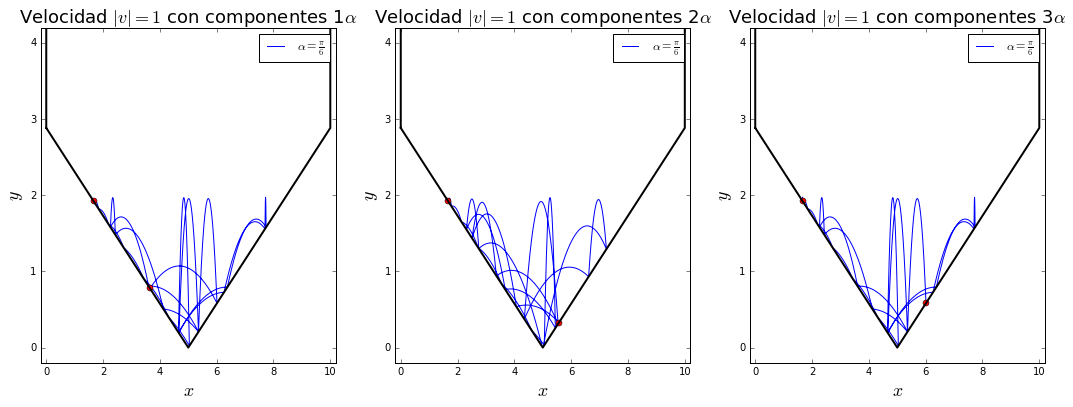

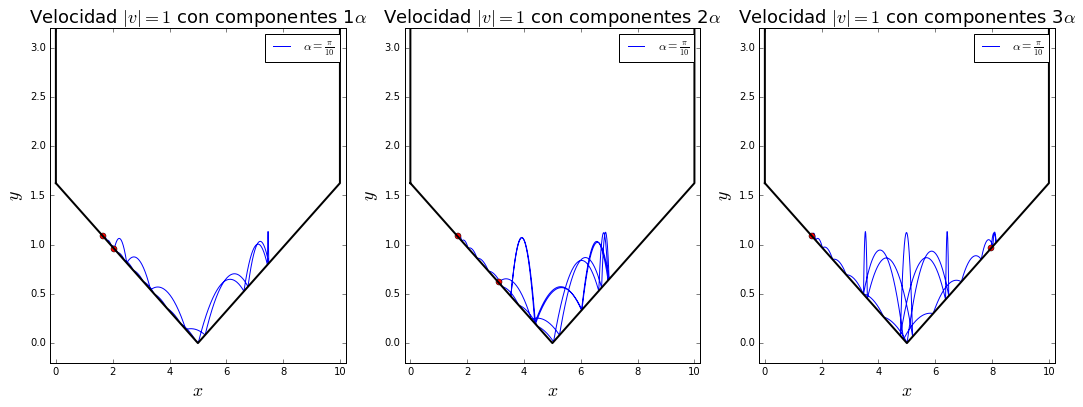

In [17]:
figure(figsize=(18,6)) #realizo una figura
alfa=pi/6 #alfa=pi/6
for j in xrange(1,4): #ciclo for
    x_y=caja([alfa,0],0.005,1,j) # caja le entra de arg el angulo, sin friccion, tiempo de integracion, modulo de velocidad e inclinacion alfa va de 1alfa a 3alfa
    subplot(1,3,j)#subplots
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{6}$") #grafica  
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro') #grafico punto inicial y final
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2) #dibujo del plano
    ylim([-0.2,4.2]) #el plano no se ve completo para apreciar los rebotes
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=1$ con componentes "+str(j)+r"$\alpha$",fontsize=18)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

figure(figsize=(18,6))
alfa=pi/10 #angulo ahora de pi/10
for j in xrange(1,4):
    x_y=caja([alfa,0],0.005,1,j)
    subplot(1,3,j)
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{10}$") #grafica
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro')
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
    ylim([-0.2,3.2])
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=1$ con componentes "+str(j)+r"$\alpha$",fontsize=18)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

(b) Introduzca algún modelo de fricción y compare las trayectorias con el inciso anterior.

Podemos observar en las siguientes gráficas como despúes de ciertos rebotes la particula queda confinada en el punto mas bajo de la caja ya que ha pérdido casi la totalidad de su energía.

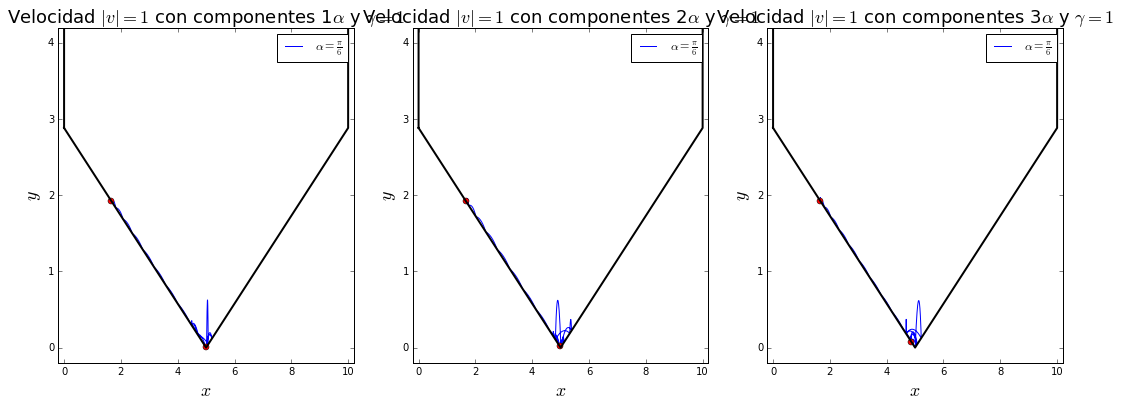

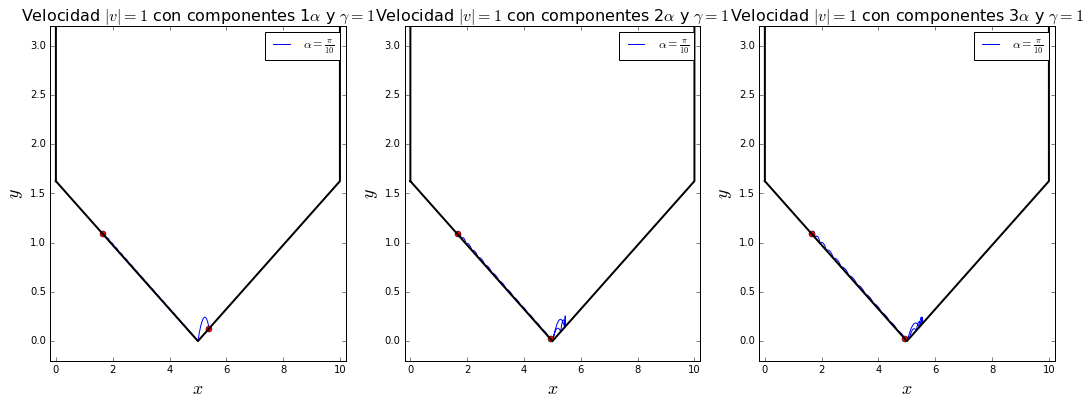

In [18]:
figure(figsize=(18,6)) #realizo una figura
alfa=pi/6 #alfa=pi/6
for j in xrange(1,4): #ciclo for
    x_y=caja([alfa,1],0.005,1,j) # caja le entra de arg el angulo, con friccion, tiempo de integracion, modulo de velocidad e inclinacion alfa va de 1alfa a 3alfa
    subplot(1,3,j)#subplots
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{6}$") #grafica  
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro') #grafico punto inicial y final
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2) #dibujo del plano
    ylim([-0.2,4.2]) #el plano no se ve completo para apreciar los rebotes
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=1$ con componentes "+str(j)+r"$\alpha$ y $\gamma=1$",fontsize=18)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

figure(figsize=(18,6))
alfa=pi/10 #angulo ahora de pi/10
for j in xrange(1,4):
    x_y=caja([alfa,1],0.005,1,j)
    subplot(1,3,j)
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{10}$") #grafica
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro')
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
    ylim([-0.2,3.2])
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=1$ con componentes "+str(j)+r"$\alpha$ y $\gamma=1$",fontsize=16)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

(c) Realice los ejercicios en los incisos (3a) y (3b) pero ahora $|\vec{v}| = 25$ y $|\vec{v}| = 60$. Describa las similitudes y diferencias entre las distintas simulaciones.

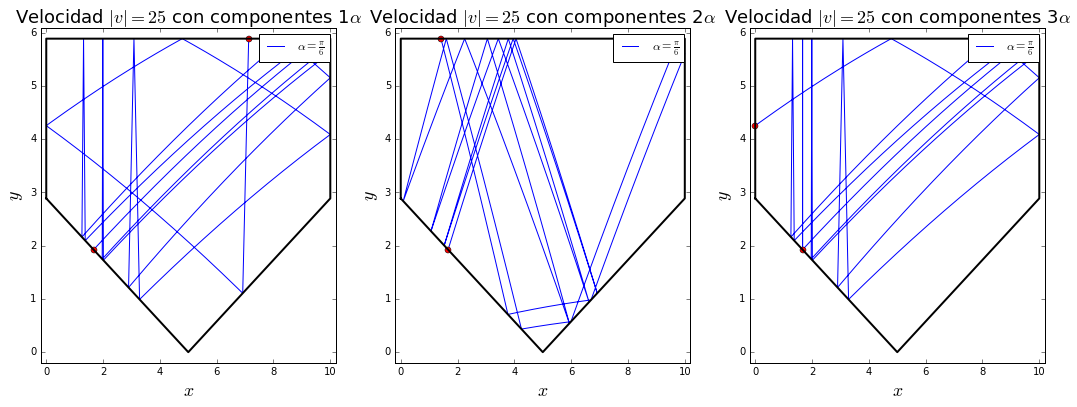

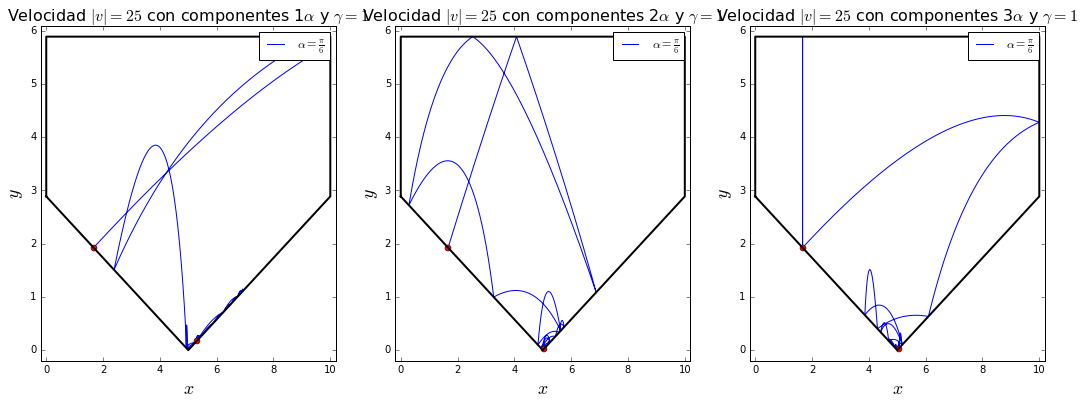

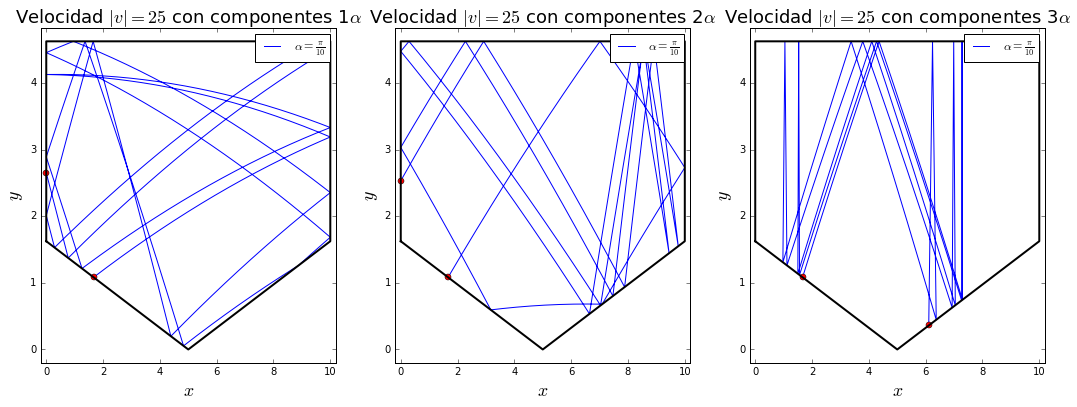

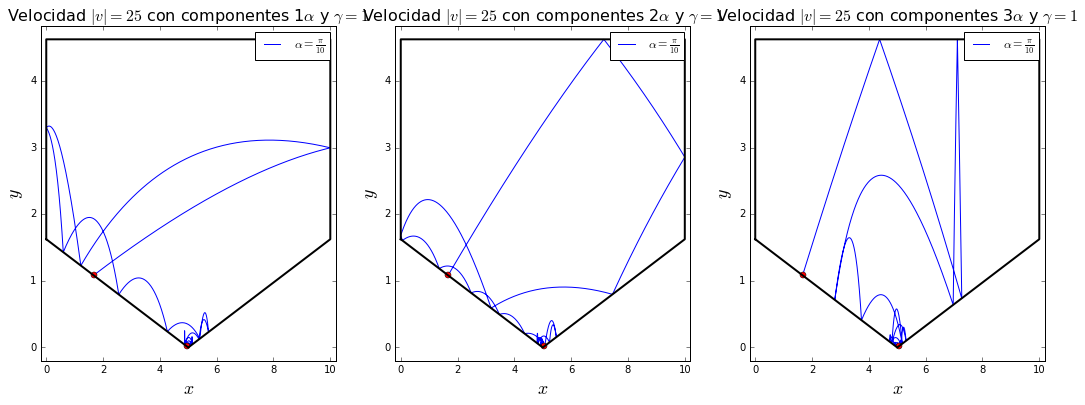

In [ ]:
figure(figsize=(18,6))
alfa=pi/6 #angulo de pi/6
for j in xrange(1,4):
    x_y=caja([alfa,0],0.005,25,j) #sin friccion y |v|=25
    subplot(1,3,j)
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{6}$") #grafica 
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro')
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
    ylim([-0.2,3.2+5*tan(alfa)])
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=25$ con componentes "+str(j)+r"$\alpha$",fontsize=18)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

figure(figsize=(18,6))
alfa=pi/6 #angulo de pi/6
for j in xrange(1,4):
    x_y=caja([alfa,1],0.005,25,j) #con friccion y |v|=25
    subplot(1,3,j)
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{6}$") #grafica 
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro')
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
    ylim([-0.2,3.2+5*tan(alfa)])
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=25$ con componentes "+str(j)+r"$\alpha$ y $\gamma=1$",fontsize=16)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

figure(figsize=(18,6))
alfa=pi/10 #angulo de pi/10
for j in xrange(1,4):
    x_y=caja([alfa,0],0.005,25,j) #sin friccion y |v|=25
    subplot(1,3,j)
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{10}$") #grafica 
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro')
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
    ylim([-0.2,3.2+5*tan(alfa)])
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=25$ con componentes "+str(j)+r"$\alpha$",fontsize=18)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

figure(figsize=(18,6))
alfa=pi/10 #angulo de pi/10
for j in xrange(1,4):
    x_y=caja([alfa,1],0.005,25,j) #con friccion y |v|=25
    subplot(1,3,j)
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{10}$") #grafica 
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro')
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
    ylim([-0.2,3.2+5*tan(alfa)])
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=25$ con componentes "+str(j)+r"$\alpha$ y $\gamma=1$",fontsize=16)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

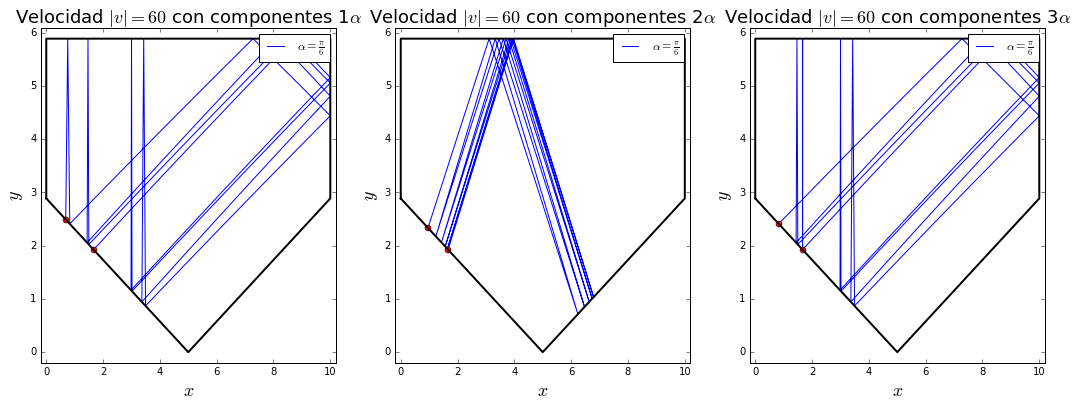

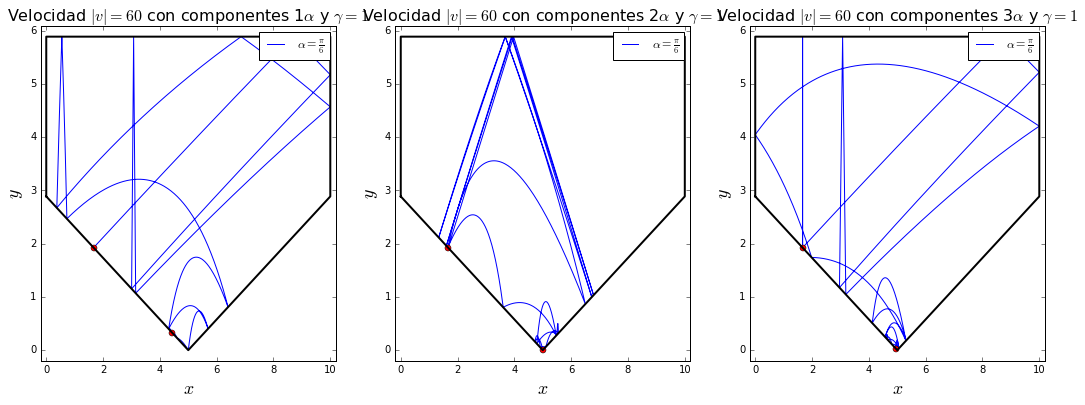

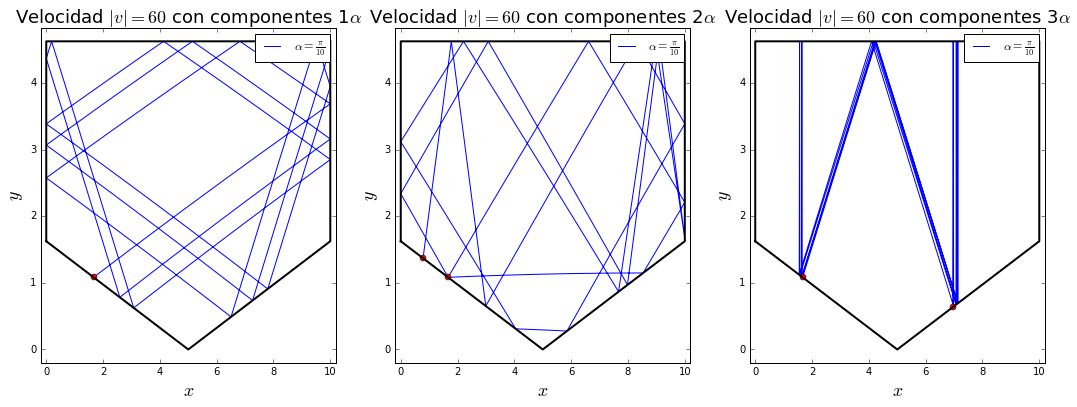

In [ ]:
figure(figsize=(18,6))
alfa=pi/6 #angulo de pi/6
for j in xrange(1,4):
    x_y=caja([alfa,0],0.005,60,j) #sin friccion y |v|=60
    subplot(1,3,j)
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{6}$") #grafica 
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro')
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
    ylim([-0.2,3.2+5*tan(alfa)])
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=60$ con componentes "+str(j)+r"$\alpha$",fontsize=18)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

figure(figsize=(18,6))
alfa=pi/6 #angulo de pi/6
for j in xrange(1,4):
    x_y=caja([alfa,1],0.005,60,j) #con friccion y |v|=60
    subplot(1,3,j)
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{6}$") #grafica 
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro')
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
    ylim([-0.2,3.2+5*tan(alfa)])
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=60$ con componentes "+str(j)+r"$\alpha$ y $\gamma=1$",fontsize=16)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

figure(figsize=(18,6))
alfa=pi/10 #angulo de pi/10
for j in xrange(1,4):
    x_y=caja([alfa,0],0.005,60,j) #sin friccion y |v|=60
    subplot(1,3,j)
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{10}$") #grafica 
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro')
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
    ylim([-0.2,3.2+5*tan(alfa)])
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=60$ con componentes "+str(j)+r"$\alpha$",fontsize=18)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

figure(figsize=(18,6))
alfa=pi/10 #angulo de pi/10
for j in xrange(1,4):
    x_y=caja([alfa,1],0.005,60,j) #con friccion y |v|=60
    subplot(1,3,j)
    plot(x_y[:,0],x_y[:,1],label=r"$\alpha=\frac{\pi}{10}$") #grafica 
    plot([x_y[0,0],x_y[-1,0]],[x_y[0,1],x_y[-1,1]],'ro')
    plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
    ylim([-0.2,3.2+5*tan(alfa)])
    xlim([-0.2,10.2])
    title(u"Velocidad $|v|=60$ con componentes "+str(j)+r"$\alpha$ y $\gamma=1$",fontsize=16)
    legend()
    xlabel("$x$",fontsize=18)
    ylabel("$y$",fontsize=18)
show()

Las diferencias entre las trayectorias son notorias a simple vista ya que cuando $|v=1|$, los rebotes son de pequeña amplitud y la mayoria del tiempo la partícula se encuentra rebotando en el medio de la caja ya que tiene muy poca energía cinética, la mayor parte de su energía es potencial y esto se aprecia en como cuando esta cerca del fondo de la caja tiene saltos de amplitud considerable, en este caso cuando existe fricción el movimiento se va apagando poco a poco quedando en el fondo de la caja que es lo que físicamente se espera (por ello es que puse un alto coeficiente de fricción).

En el caso de $|v|=25$, la amplitud ya es notoriamente mayor ya que logra rebotar con el techo, además de que se aprecian los tiros parábolicos en este caso la energía cinética es considerablemente más grande que la potencial que puede alcanzar por lo que va realizando varios rebotes, cuando el modelo tiene fricción poco tiempo despúes de iniciada la simulación lo que se encuentra es que la velocidad va decayendo rápido hasta que logra quedarse en el fondo de la caja.

Para $|v|=60$, ya es una velocidad muy muy alta, la energía cinética supera en gran cantidad a la potencial que puede llegar a tener dentro de la caja la partícula por lo que incluso es difícil apreciar el tiro parábolico, se ven más como rectas, dada la alta velocidad y lo pequeña que es la caja, en contraste a esto vemos que en el caso de fricción los primeros rebotes son muy similares al modelo sin fricción pero al cabo de unos cuantos se aprecia como la velocidad comienza a disminuir hasta que logra quedarse en el fondo del potencial.

(d) Dibuje el espacio fase $P_x$, $x$ y $P_y$, $y$ cuando no hay fricción y la partícula es lanzada hacia la derecha a un ángulo $α$ y vertical hacia arriba. Tome en cuenta el número necesario de rebotes para que la simulación pueda barrer el espacio fase de manera representativa.

In [ ]:
vel=[1,25,60] #velocidades representativas
alfa=pi/6 #angulo de pi/6
figure(figsize=(16,24)) #figura
for k in range(len(vel)): #para cada velocidad
    subplot(3,2,2*k+1) #subplot
    x_y=caja([alfa,0],0.005,vel[k],1,50) #funcion caja sin friccion a un angulo alfa
    plot(x_y[:,0],x_y[:,2],label=r"Proyeccion $P_x$ vs $x$ con $|v|=$"+str(vel[k])) # espacio P_x,x
    plot(x_y[:,1],x_y[:,3],label=r"Proyeccion $P_y$ vs $y$ con $|v|=$"+str(vel[k])) #espacio P_y,y
    plot([x_y[0,0],x_y[0,1]],[x_y[0,2],x_y[0,3]],'ko') #grafico primeros puntos (cond inicial)
    title(r"Proyecciones del espacio fase para un tiro con angulo $\alpha=\frac{\pi}{6}$",fontsize=14)
    legend()
    xlabel("$x$,$y$",fontsize=14)
    ylabel("$P_x$,$P_y$",fontsize=14)
    subplot(3,2,2*k+2) #subplots
    x_y=caja([alfa,0],0.005,vel[k],3,50) #funcion caja sin friccion el angulo es alfa pero las componetes son 3 alfa, por lo que la componente en y es v*sin(pi/2)=v es tiro vertical
    plot(x_y[:,0],x_y[:,2],label=r"Proyeccion $P_x$ vs $x$ con $|v|=$"+str(vel[k])) #grafica de P_x,x
    plot(x_y[:,1],x_y[:,3],label=r"Proyeccion $P_y$ vs $y$ con $|v|=$"+str(vel[k])) #grafica de P_y,y
    plot([x_y[0,0],x_y[0,1]],[x_y[0,2],x_y[0,3]],'ko') #grafico condiciones iniciales
    title(r"Proyecciones del espacio fase para un tiro vertical $\alpha=\frac{\pi}{2}$",fontsize=14)
    legend(loc=0, bbox_to_anchor=(1,1))
    xlabel("$x$,$y$",fontsize=14)
    ylabel("$P_x$,$P_y$",fontsize=14)


### 4. Se tiene una partícula de masa m = 1 en una caja circular como se muestra en la Figura 2. Los radios de a y b son tales que b = 2a.


(a) Realice una simulación en donde la partícula realiza varios rebotes en las paredes de la caja. Suponga condiciones iniciales arbitrarias que le permitan hacer lo anterior.

In [ ]:
def ec(r_v,t,g=9.8,m=1): #ecuaciones de movimiento
    dx = r_v[2] #derivada de x
    dy = r_v[3] #derivada de y
    dvx = 0 #derivada de vx no hay fuerza
    dvy = 0 #derivada de vy no hay fuerzas
    return array([dx,dy,dvx,dvy]) #me regresa array de las derivadas


def paredes(ecuacion,r_v_i,mi_dt,r):
    theta=linspace(-pi,pi,100) #hago una partición de los ángulos
    dt_bus=mi_dt/2 #mi dt se reduce en 2
    t,sol=RK4(ecuacion,r_v_i,[0,dt_bus]) #integro la ecuacion de 0 a dt
    p_r=r_v_i #mi punto r es el punto que le he dado anteriormente como argumento a la función
    pmed=sol[-1,:] #el punto medio (de referencia) sera el ultimo que se obtuvo en la integración
    for j in range(len(theta)): #para cada angulo
        if p_r[0]>=0: #si el punto es positivo en el eje x
            th=theta[j] #entonces el angulo corresponde a el j-esimo elemento de theta
        else: #si es negativo en x
            th=theta[j]+pi #sumale pi, esto es porque mi partición es de -pi a pi, ya que la arctangente esta definida en estos valores
        if abs(arctan(p_r[1]/p_r[0])-theta[j])<=0.03: #si el angulo que forma el punto respecto al centro esta un rango cercano a theta[j]
            while abs(p_r[0]*cos(th)+p_r[1]*sin(th)-r)>1e-2: #corre un ciclo while, si esta cerca de la frontera de los radios
                if (sqrt(p_r[0]**2+p_r[1]**2)-r)*(r)<0: #si ademas un punto se logra salir
                    reinicio = p_r #p_r es la nueva condicion
                else: #si no se logra salir
                    reinicio = pmed #pmed es la nueva condicion
                dt_bus=dt_bus/2 #reduce dt a la mitad una vez mas
                t,sol=RK4(ecuacion,reinicio,[0,dt_bus]) #vuelve a integrar
                p_r=reinicio #el nuevo punto cercano al radio
                pmed=sol[-1,:] #el nuevo punto de referencia es el punto de la ultima integracion
            vx,vy=p_r[2],p_r[3] #defino las velocidad en x y y
            #en las siguientes lineas realizo rotaciones de tal manera de tener las velocidad en terminos de los ejes normal y tangencial a los circulos de la dona
            vx_1=-(vx*cos(th)+vy*sin(th)) #la componente radial de la velocidad ademas de ser rotada cambia su signo para que regrese y no se salga de los radios definidos
            vy_1=-vx*sin(th)+vy*cos(th) #la velocidad en y solo es rotada
            vx_2=vx_1*cos(th)-vy_1*sin(th) #aplico las rotaciones inversas correspondientes
            vy_2=vx_1*sin(th)+vy_1*cos(th)
            p_r=array([p_r[0],p_r[1],vx_2,vy_2]) #el punto r va ser un array con las nuevas velocidades
    return p_r #devuelveme el punto p_r


In [ ]:
def dona(ecuacion,dt,cond_ini,N=100,a=1): #defino la funcion de mi dona
    trayectoria=zeros((N,len(cond_ini))) #primero la trayectoria es una matriz de N renglones y 4 columnas
    trayectoria[0,:]=array(cond_ini) #el primer renglon sera la condicion inicial
    for i in xrange(N-1): #para cada i de 1 a N-1
        t,sol_dt=RK4(ecuacion,trayectoria[i,:],[0,dt]) #realiza una integracion tomando el ultimo vector de trayectoria y en el intervalo 0 a dt
        if abs(sol_dt[-1,:][0]**2 + sol_dt[-1,:][1]**2 - 4*a*a)<=1e-2: #si se encuentra cerca del radio mayor
            punto=paredes(ecuacion,trayectoria[i,:],dt,2*a) #haz que rebote la partícula en el radio mayor
            trayectoria[i+1,:]=punto #y anexa ese punto a la trayectoria
        elif abs(sol_dt[-1,:][0]**2 + sol_dt[-1,:][1]**2 - a*a)<=1e-2: #si rebota en el radio menor
            punto=paredes(ecuacion,trayectoria[i,:],dt,a) #la particula rebota sobre el radio menor
            trayectoria[i+1,:]=punto  #anexa el ultimo punto a trayectoria
        else: #si se encuentra en medio de la dona
            trayectoria[i+1] = sol_dt[-1,:] #la trayectoria es el ultimo punto de la integracion
    return trayectoria #regresa la trayectoria

In [ ]:
cond=array([0.1,1.,-0.7,-1.2]) #condiciones inciales elegidas arbitrarias
print "Condiciones iniciales (x,y,vx,vy)= ",cond #imprimo las condiciones iniciales
res=dona(ec,0.002,cond,10000) #pongo a funcionar la funcion dona
plot(res[:,0],res[:,1],label=u"Trayectoria de la partícula") #grafico los resultados
ang=linspace(0,2*pi) #linspace para dibujar los circulos
plot(cos(ang),sin(ang))#circulo menor
plot(2*cos(ang),2*sin(ang))#circulo mayor
plot(res[0,0],res[0,1],'ko')#punto inicial
title(u"Partícula confinada en una dona",fontsize=14) #titulos y leyendas 
legend(loc=0, bbox_to_anchor=(1,1))
xlabel("$x$",fontsize=14)
ylabel("$y$",fontsize=14)
axis('equal')
show()

(b) ¿Existen condiciones iniciales que hagan que la partícula quede encasillada en sólo un sector de la caja?. De ser así muestre cuales son tales condiciones o demuestre porque no se pueden obtener dicha situación.

Si se pueden tener ya que basicamente lo que realiza el choque con las paredes circulares es una "reflexión", que solo modifica su velocidad normal a la circunferencia por lo que si la velocidad de incidencia va en dirección normal tendremos que la partícula solo rebotaria entre las dos paredes por mucho tiempo sin desviar su trayectoria. Hagamos una simulación.

In [ ]:
res=dona(ec,0.002,[0,1.5,0,2.],4000) #ejemplo 1
res2=dona(ec,0.002,[1.5,0.5,1.5,0.5],4000) #ejemplo 2
plot(res[:,0],res[:,1],label="Ejm 1") #graficas
plot(res2[:,0],res2[:,1],label="Ejm 2")
ang=linspace(0,2*pi)
plot(cos(ang),sin(ang)) #graficas de los ciruclos
plot(2*cos(ang),2*sin(ang))
plot([res[0,0],res2[0,0]],[res[0,1],res2[0,1]],'ko')
axis('equal')
title(u"Ejemplos partículas en una sección de la dona",fontsize=14) #titulos y leyendas 
legend(loc=0, bbox_to_anchor=(1,1))
xlabel("$x$",fontsize=14)
ylabel("$y$",fontsize=14)
axis('equal')
show()

(c) Si ahora se tiene un campo gravitacional uniforme $\vec{g} = 10\hat{n}$. Que condiciones iniciales se tendrían que cumplir para que la partícula sólo pueda ocupar la mitad de la dona.

Lo que necesita es que la velocidad iniciales sean tales que no superen el campo gravitacional y queden confinadas a la mitad de la donda donde el campo atrae, en este caso elijo la direccion de -$\hat{j}$. Y probemos con algunas condiciones iniciales.
Algunas podrias ser velocidad en la compoente y negativas o si son positivas no sean muy grandes.

In [ ]:
def ec_g(r_v,t,args=[0]): #ecuaciones de movimiento
    dx = r_v[2] #derivada de x
    dy = r_v[3] #derivada de y
    dvx = 0 #derivada de vx 
    dvy = -9.81 #derivada de vy con gravedad
    return array([dx,dy,dvx,dvy]) #me regresa array de las derivadas

res=dona(ec_g,0.001,[0.1,1.,2,5],4000)
res1=dona(ec_g,0.001,[0.5,-1.5,-2,-3],4000)
res2=dona(ec_g,0.001,[1.5,0.2,1,2],4000)
figure(figsize=(24,8))

subplot(1,3,1)
plot(res[:,0],res[:,1])
ang=linspace(0,2*pi)
plot(cos(ang),sin(ang))
plot(2*cos(ang),2*sin(ang))
plot(res[0,0],res[0,1],'ko')
xlabel("$x$",fontsize=16)
ylabel("$y$",fontsize=16)
title("Particula no queda atrapa en media dona",fontsize=16)
axis('equal')
subplot(1,3,2)
plot(res1[:,0],res1[:,1])
ang=linspace(0,2*pi)
plot(cos(ang),sin(ang))
plot(2*cos(ang),2*sin(ang))
plot(res1[0,0],res1[0,1],'ko')
xlabel("$x$",fontsize=16)
ylabel("$y$",fontsize=16)
title("Particula queda atrapa en una porcion de dona rebotando",fontsize=16)
axis('equal')
subplot(1,3,3)
plot(res2[:,0],res2[:,1])
ang=linspace(0,2*pi)
plot(cos(ang),sin(ang))
plot(2*cos(ang),2*sin(ang))
plot(res2[0,0],res2[0,1],'ko')
xlabel("$x$",fontsize=16)
ylabel("$y$",fontsize=16)
title("Particula queda atrapa en media dona rosandola",fontsize=16)
axis('equal')
show()

Punto extra: Realice una animación para alguna trayectoria del problema en el inciso (3c) y otra animación para el inciso (4c).

In [ ]:
x_y=caja([pi/6,0.2],0.005,25,1)
x=x_y[:,0]
y=x_y[:,1]
figura = figure() #hago una figura
ejes = axes(xlim=(-.2, 10), ylim=(-.2, 6.2)) #limites de los ejes
gca().set_aspect('equal', adjustable='box')
plot(x[0], y[0], 'bo', markersize=10.0,) #grafico la condicion inicial
plot([0,5,10,10,0,0],[5*tan(pi/6),0,5*tan(pi/6),3+5*tan(pi/6),3+5*tan(pi/6),5*tan(pi/6)],'k',lw=2)
trayectoria, = ejes.plot([], [],'b-') #trayectoria 
punto, = ejes.plot([], [], 'r.', markersize=15.0) #punto que se movera
title('$|v|=25$, $\gamma=0.2$',fontsize=18) #titulo y leyenda a ejes
xlabel('$x$',fontsize=16)
ylabel(r'$y$',fontsize=16)

def init(): #funcion que me regresa la trayectoria y la particula
    trayectoria, = ejes.plot([], [])
    punto.set_data([],[])
    return trayectoria, punto

def animar(i): #funcion que hace la animación
    trayectoria.set_data(x[:i], y[:i]) #la trayectoria de x e y
    punto.set_data(x[i],y[i]) #El punto sigue su trayectoria
    return trayectoria, punto
animation.FuncAnimation( figura , animar , init_func=init , frames=len(x) , interval=30, blit=True ) #animo

In [ ]:
res=dona(ec_g,0.001,[0.5,-1.5,-2,-3],4000)
x=res[:,0]
y=res[:,1]
figura = figure() #hago una figura
ejes = axes(xlim=(-.2, 6), ylim=(-.2, 10.2)) #limites de los ejes
gca().set_aspect('equal', adjustable='box')
plot(x[0], y[0], 'bo', markersize=10.0,) #grafico la condicion inicial
ang=linspace(0,2*pi)
plot(cos(ang),sin(ang))
plot(2*cos(ang),2*sin(ang))
trayectoria, = ejes.plot([], [],'b-') #trayectoria 
punto, = ejes.plot([], [], 'r.', markersize=15.0) #punto que se movera
title(r'Particula en una caja con campo $\vec{g}=-9.81\hat{j}$',fontsize=18) #titulo y leyenda a ejes
xlabel('$x$',fontsize=16)
ylabel(r'$y$',fontsize=16)

def init(): #funcion que me regresa la trayectoria y la particula
    trayectoria, = ejes.plot([], [])
    punto.set_data([],[])
    return trayectoria, punto

def animar(i): #funcion que hace la animación
    trayectoria.set_data(x[:i], y[:i]) #la trayectoria de x e y
    punto.set_data(x[i],y[i]) #El punto sigue su trayectoria
    return trayectoria, punto
animation.FuncAnimation( figura , animar , init_func=init , frames=len(x) , interval=30, blit=True ) #animo